# EDA
### Importamos las librerias necesarias para realizar el EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import datetime

In [2]:
df_reviews2=pd.read_csv('reviews_parte2.csv')

## vision general de dataframe

In [3]:
# Mostrar información general
print(df_reviews2.info())

# Mostrar las primeras filas
print(df_reviews2.head())

# Estadísticas descriptivas
print(df_reviews2.describe(include='all'))

# Verificar valores nulos
print(df_reviews2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063875 entries, 0 to 2063874
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   stars        int64 
 2   text         object
 3   date         object
dtypes: int64(1), object(3)
memory usage: 63.0+ MB
None
              business_id  stars  \
0  5qWdftveruKnOJ9FKXcGcA      4   
1  uizQiDP3fYaDvCxuwMaSew      3   
2  ZW5RwyoMuAjXsAsrHxMv3w      5   
3  -OKB11ypR4C8wWlonBFIGw      4   
4  qKg3Vu-be1PExiSOX6pTqg      4   

                                                text                 date  
0  I surprised my husband with a res here for his...  2016-07-30 19:15:06  
1  I really wanted to like this place, but it's n...  2014-09-02 20:26:31  
2  Sean, Rowe, Danny, Nicole, and the rest of the...  2013-07-24 00:14:36  
3  This review is for seafood restaurant.  It's v...  2017-11-05 17:34:26  
4  Very fun decorations! You use a clean grease r...  2018-03-13 01:18:02  
         

## Comportamiento de usuarios y negocios destacados

Número de negocios únicos: 58482
Top 10 negocios con más reseñas:
business_id
GXFMD0Z4jEVZBCsbPf4CTQ    4797
VaO-VW3e1kARkU9bP1E7Fw    3671
iSRTaT9WngzB8JJ2YKJUig    3447
VVH6k9-ycttH3TV_lk5WfQ    3274
6a4gLLFSgr-Q6CZXDLzBGQ    3111
6ajnOk0GcY9xbb5Ocaw8Gw    2461
XnQ84ylyAZwh-XfHGGNBbQ    2374
wz8ZPfySQczcPgSyd33-HQ    2227
PGd06nrseC2YAIqP6S9gUA    2176
OWOOc0YjU_kioLeEgo5VCA    2121
Name: count, dtype: int64


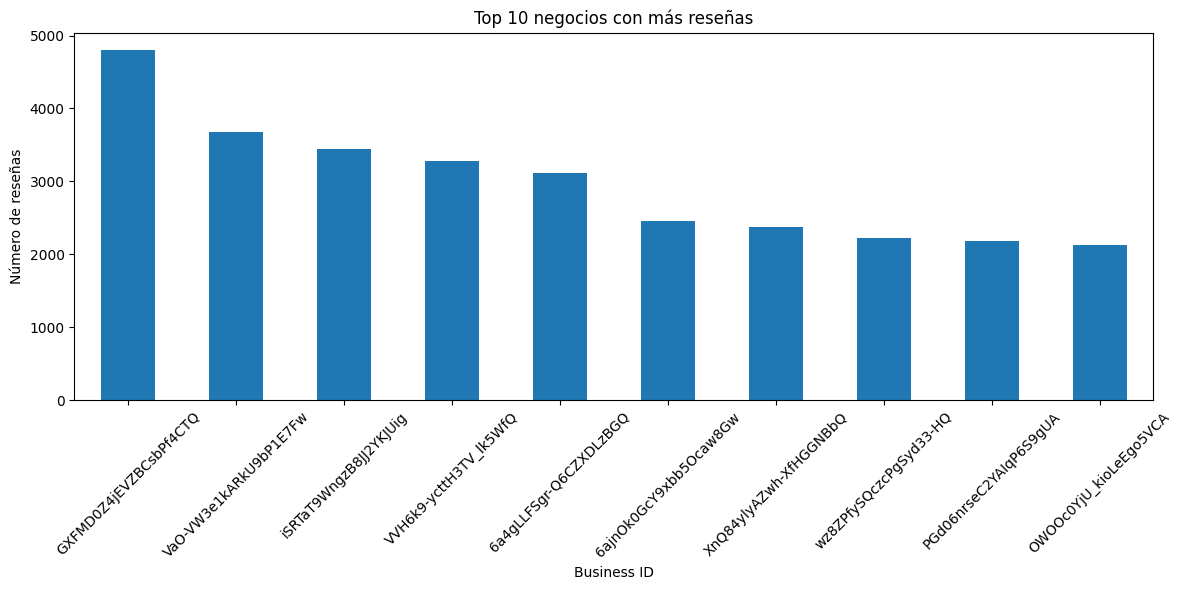

In [4]:
# Contar los negocios únicos
unique_businesses = df_reviews2['business_id'].nunique()
print(f"Número de negocios únicos: {unique_businesses}")

# Top 10 negocios con más reseñas
top_businesses = df_reviews2['business_id'].value_counts().head(10)
print("Top 10 negocios con más reseñas:")
print(top_businesses)

# Visualizar top 10 negocios
plt.figure(figsize=(12, 6))
top_businesses.plot(kind='bar')
plt.title('Top 10 negocios con más reseñas')
plt.xlabel('Business ID')
plt.ylabel('Número de reseñas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### * La concentración de un gran número de reseñas en pocos negocios (como se ve en el gráfico de top 10) podría indicar la presencia de "superestrellas" en la plataforma.
### * Estos negocios altamente reseñados podrían ser puntos de referencia importantes para la comunidad o negocios que han logrado cultivar una base de clientes muy comprometida.
### * La diferencia entre el más reseñado y el décimo más reseñado sugiere una distribución de cola larga en la atención de los usuarios.

## Polarización de opiniones y psicología del consumidor

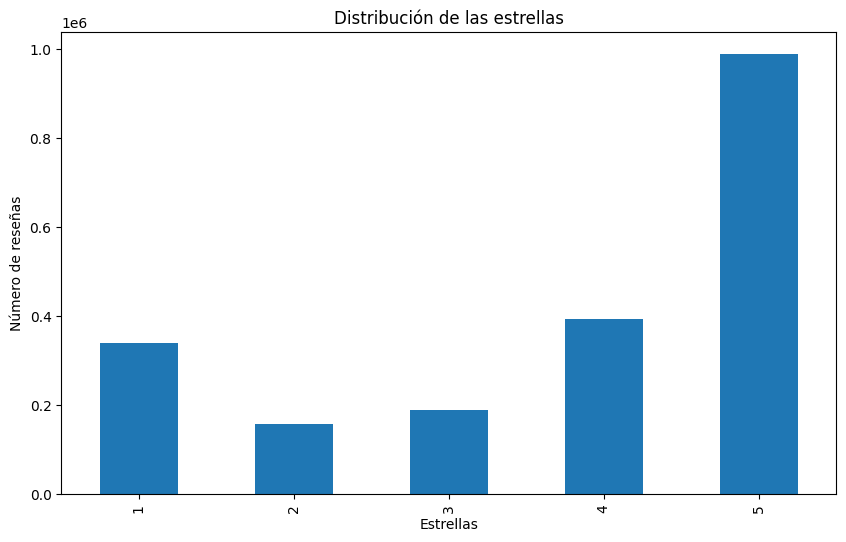

count    2.063875e+06
mean     3.744233e+00
std      1.510946e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64


In [5]:
    # Distribución de las estrellas
plt.figure(figsize=(10, 6))
df_reviews2['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de las estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Número de reseñas')
plt.show()

# Estadísticas de las estrellas
print(df_reviews2['stars'].describe())



### * La distribución en forma de U de las calificaciones por estrellas (con picos en 1 y 5 estrellas) sugiere una tendencia a la polarización en las opiniones de los usuarios.
### * Esto podría indicar un sesgo de acción, donde los usuarios están más motivados a escribir reseñas cuando tienen experiencias muy positivas o muy negativas.
### * La menor frecuencia de reseñas de 3 estrellas podría sugerir que las experiencias "promedio" no motivan tanto a los usuarios a dejar reseñas.

## Evolución temporal y impacto de eventos externos

In [6]:
#VERIFICAMOS QUE LA COLUMNA DATE TENGA TIPO DE DATO DATETIME
df_reviews2['date'] = pd.to_datetime(df_reviews2['date'])

#creamos una columna con años
df_reviews2['year'] = df_reviews2['date'].dt.year

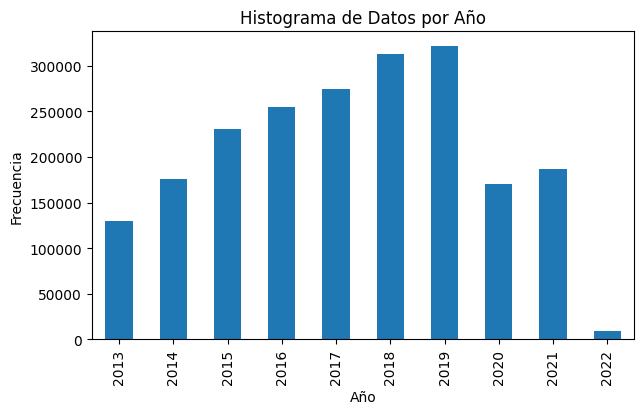

In [7]:
plt.figure(figsize=(7, 4))
df_reviews2['year'].value_counts().sort_index().plot(kind='bar')
# Añadir títulos y etiquetas
plt.title('Histograma de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### * El crecimiento constante de datos hasta 2019 sugiere una adopción creciente de la plataforma de reseñas o un aumento en la base de usuarios/negocios.
### * La caída abrupta en 2020 y la recuperación gradual posterior indican un fuerte impacto de la pandemia de COVID-19 en la actividad de reseñas, posiblemente reflejando cierres de negocios y cambios en los hábitos de consumo.
### * La recuperación post-2020 no alcanza niveles previos, lo que podría indicar cambios duraderos en el comportamiento del consumidor o en el panorama empresarial.

## Patrones de escritura y engagement del usuario

count    2.063875e+06
mean     5.483346e+02
std      5.153031e+02
min      0.000000e+00
25%      2.210000e+02
50%      3.900000e+02
75%      6.920000e+02
max      5.090000e+03
Name: longitud_texto, dtype: float64


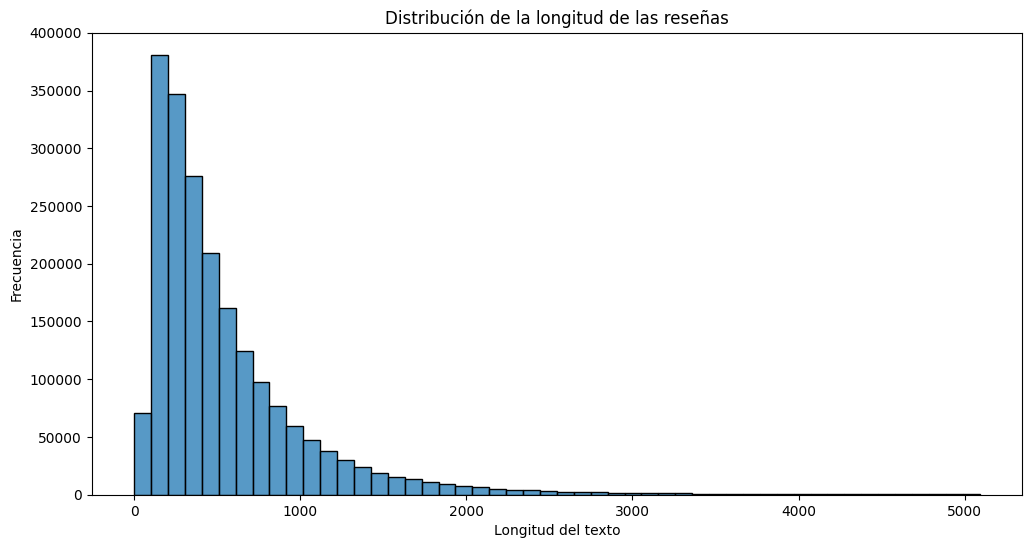

In [8]:
# Manejar valores nulos y convertir a string
df_reviews2['text'] = df_reviews2['text'].fillna('')  # Reemplazar NaN con string vacío
df_reviews2['text'] = df_reviews2['text'].astype(str)  # Convertir a string

df_reviews2['longitud_texto'] = df_reviews2['text'].apply(len)

print(df_reviews2['longitud_texto'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_reviews2['longitud_texto'], bins=50)
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()



### * La distribución de la longitud de las reseñas muestra que la mayoría de los usuarios prefieren escribir reseñas cortas y concisas.
### * Sin embargo, la larga cola hacia la derecha indica que hay un subconjunto de usuarios muy comprometidos que escriben reseñas extensas y detalladas.
### * Esto podría sugerir diferentes niveles de compromiso del usuario, desde evaluaciones rápidas hasta análisis en profundidad